In [11]:
import os
import gc
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import spatialdm as sdm


import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#Get the main genes ...
#check out the distribution of the genes
#Create violin plots to get hte ligans and receptors 

In [12]:
# import the tissues 
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_1_RCTD_lvl3.h5ad"
chuvio_L1_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_2_RCTD_lvl3.h5ad"
chuvio_L1_2 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L2_1_RCTD_lvl3.h5ad"
chuvio_L2_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L3_1_RCTD_lvl3.h5ad"
chuvio_L3_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L4_1_RCTD_lvl3.h5ad"
chuvio_L4_1 = sc.read_h5ad(path)

In [13]:
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B1_1.h5ad"
chuvio_B1_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B1_2.h5ad"
chuvio_B1_2 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B2_1.h5ad"
chuvio_B2_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B3_1.h5ad"
chuvio_B3_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B4_1.h5ad"
chuvio_B4_1 = sc.read_h5ad(path)

In [15]:
chuvio_L1_1.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,...,total,libsize_drop,sizeFactor,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,singler_annotation,ident,RCTD_lvl3
L1_1_aaaadbga-1,L1,413.0,103,L1_1_aaaadbga-1,1186.546265,1686.810181,413,1,0,0,...,413.0,False,2.515645,143.0,52,9,9,Fibroblasts,9,DC_2
L1_1_aaaajnma-1,L1,253.0,86,L1_1_aaaajnma-1,1194.922241,1699.988892,253,1,0,0,...,253.0,False,1.541061,159.0,78,9,9,Fibroblasts,9,Endothelia_vascular
L1_1_aaadecno-1,L1,176.0,66,L1_1_aaadecno-1,1196.921997,1708.868652,176,0,0,0,...,176.0,False,1.072042,157.0,66,9,9,Pericytes,9,Pericyte
L1_1_aaafkiae-1,L1,293.0,111,L1_1_aaafkiae-1,1204.801636,1698.712280,293,1,0,0,...,293.0,False,1.784707,155.0,88,6,6,Fibroblasts,6,Endothelia_vascular
L1_1_aaahijio-1,L1,175.0,73,L1_1_aaahijio-1,1209.148804,1690.650635,175,0,0,1,...,175.0,False,1.065951,154.0,72,8,8,Pericytes,8,Pericyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L1_1_oielkile-1,L1,131.0,54,L1_1_oielkile-1,2610.254639,992.233582,131,0,0,0,...,131.0,False,0.797941,133.0,53,17,17,Fibroblasts,17,Endothelia_vascular
L1_1_oieofjmb-1,L1,144.0,44,L1_1_oieofjmb-1,2618.554688,977.565002,145,0,0,0,...,145.0,False,0.877126,142.0,42,9,9,Fibroblasts,9,Fibroblast
L1_1_oieokhmm-1,L1,158.0,69,L1_1_oieokhmm-1,2618.840332,959.367188,158,0,0,0,...,158.0,False,0.962402,151.0,67,9,9,Endothelia_lymphatic,9,Endothelia_vascular
L1_1_oifafdfc-1,L1,123.0,54,L1_1_oifafdfc-1,2634.781250,942.610168,123,0,0,0,...,123.0,False,0.749211,128.0,52,10,10,Tu_L1_SFTPB,10,Tu_L1


# With violin plots

In [26]:
chuvio_L1_1

AnnData object with n_obs × n_vars = 71187 × 313
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident', 'RCTD_lvl3'
    uns: 'X_name'
    obsm: 'PCA', 'TSNE', 'UMAP'
    layers: 'logcounts'

In [15]:
chuvio_L1_1.uns['X_name']

'counts'

In [12]:
chuvio_L1_1.layers['logcounts']

<71187x313 sparse matrix of type '<class 'numpy.float64'>'
	with 3873591 stored elements in Compressed Sparse Column format>

In [13]:
transformed_counts = chuvio_L1_1.layers['logcounts'].toarray()

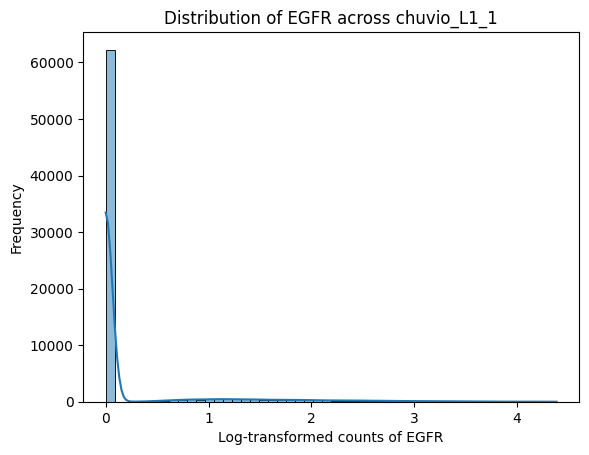

In [35]:
# Load your AnnData object (replace with your actual loading code)
adata = chuvio_L1_1  # Load your AnnData object here
gene = 'EGFR'
name_tissue = 'chuvio_L1_1'

if 'logcounts' in adata.layers:
    logcounts = chuvio_L1_1.layers['logcounts']
    
gene_idx = adata.var_names.get_loc(gene)

egfr_logcounts = logcounts[:, gene_idx].toarray().flatten() 


# Plot the distribution using seaborn
sns.histplot(ccl5_logcounts, bins=50, kde=True)
plt.xlabel(f'Log-transformed counts of {gene}')
plt.ylabel('Frequency')
plt.title(f'Distribution of {gene} across {name_tissue}')
plt.show()

In [ ]:
ccl5_logcounts
ccr5_logcounts
egf_logcounts
egfr_logcounts

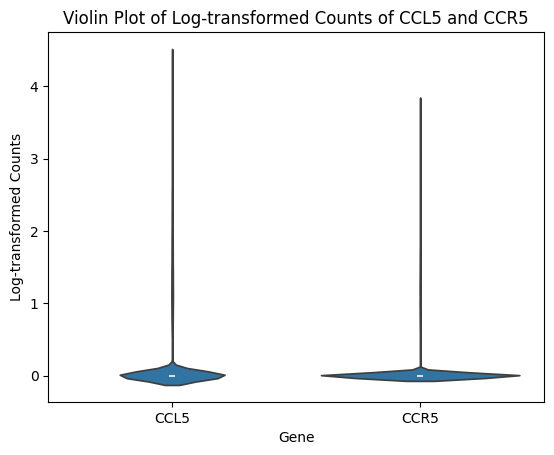

In [33]:
data = pd.DataFrame({'Gene': ['CCL5'] * len(ccl5_logcounts) + ['CCR5'] * len(ccr5_logcounts),
                     'Log-transformed Counts': np.concatenate([ccl5_logcounts, ccr5_logcounts])})

# Plot the violin plot
sns.violinplot(x='Gene', y='Log-transformed Counts', data=data)
plt.xlabel('Gene')
plt.ylabel('Log-transformed Counts')
plt.title('Violin Plot of Log-transformed Counts of CCL5 and CCR5')
plt.show()

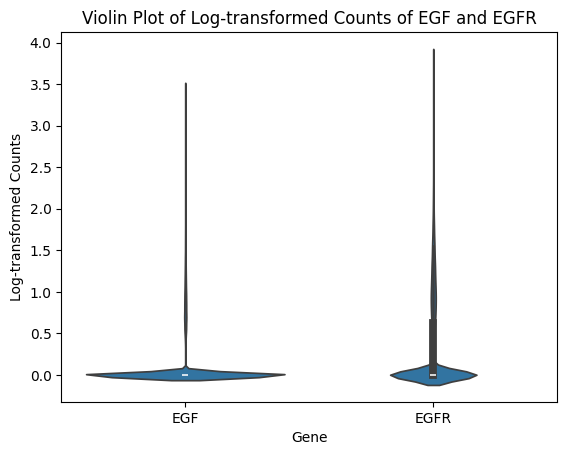

In [36]:
g1 = 'EGF'
g2 = 'EGFR'

data = pd.DataFrame({'Gene': [f'{g1}'] * len(egf_logcounts) + [f'{g2}'] * len(egfr_logcounts),
                     'Log-transformed Counts': np.concatenate([egf_logcounts, egfr_logcounts])})

# Plot the violin plot
sns.violinplot(x='Gene', y='Log-transformed Counts', data=data)
plt.xlabel('Gene')
plt.ylabel('Log-transformed Counts')
plt.title(f'Violin Plot of Log-transformed Counts of {g1} and {g2}')
plt.show()

So there are some cells that have nearly 10 000 counts fr that specific gene, most cells have 0 or nearly 0 though. 

# Using the Seurat plots 

In [2]:
Check the following genes :
- EREG EGFR
- CCR1 CCR3 CCR4 CCR5

-CXCL12 CXCR4
-


NameError: name 'm' is not defined